In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import r2_score, mean_squared_error
import time


import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/vignay21/Prepinsta-Winter-Internship/main/PrepInsta-Week6/Superstore/train.csv')
df.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
5,6,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600
6,7,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800
7,8,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520
8,9,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040
9,10,CA-2015-115812,09/06/2015,14/06/2015,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032.0,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000


In [3]:
df.shape

(9800, 18)

In [4]:
df.info

<bound method DataFrame.info of       Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
0          1  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
1          2  CA-2017-152156  08/11/2017  11/11/2017    Second Class   
2          3  CA-2017-138688  12/06/2017  16/06/2017    Second Class   
3          4  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
4          5  US-2016-108966  11/10/2016  18/10/2016  Standard Class   
...      ...             ...         ...         ...             ...   
9795    9796  CA-2017-125920  21/05/2017  28/05/2017  Standard Class   
9796    9797  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9797    9798  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9798    9799  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   
9799    9800  CA-2016-128608  12/01/2016  17/01/2016  Standard Class   

     Customer ID     Customer Name    Segment        Country             City  \
0       CG-12520      

In [5]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

2. Data Cleaning: Handle missing values, if any, and check for any anomalies in the data.

In [6]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [7]:
df.loc[df["Postal Code"].isna(),['Country','City','State','Postal Code']]

,Country,City,State,Postal Code
2234,United States,Burlington,Vermont,NaN
5274,United States,Burlington,Vermont,NaN
8798,United States,Burlington,Vermont,NaN
9146,United States,Burlington,Vermont,NaN
9147,United States,Burlington,Vermont,NaN
9148,United States,Burlington,Vermont,NaN
9386,United States,Burlington,Vermont,NaN
9387,United States,Burlington,Vermont,NaN
9388,United States,Burlington,Vermont,NaN
9389,United States,Burlington,Vermont,NaN


In [8]:
df.loc[(df['City']=='Burlington') & (df['State']=='Vermont'),['Country','Postal Code']]

,Country,Postal Code
2234,United States,NaN
5274,United States,NaN
8798,United States,NaN
9146,United States,NaN
9147,United States,NaN
9148,United States,NaN
9386,United States,NaN
9387,United States,NaN
9388,United States,NaN
9389,United States,NaN


Filling the NaN values

In [9]:
final=df.copy()
final["Postal Code"]=final["Postal Code"].fillna(5041)

In [10]:
final.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

TO REMOVE ALL NaN VALUES (OPTIONAL)

In [11]:
final_1 = df.copy()

In [12]:
final_1.isna().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [13]:
final_1 = final_1.dropna(subset=["Postal Code"])


In [14]:
final_1.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [15]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

3. Data Types: Check the data types of each column. Ensure they are appropriate for the analysis.

In [16]:
print(final.dtypes)

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object


Changeing the datatype of Postal Code from float64 to int64

In [17]:
# Convert multiple columns to different data types
final['Postal Code'] = final['Postal Code'].astype(int)
print(final.dtypes)

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int32
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object


4. Descriptive Statistics: Calculate basic descriptive statistics for key numeric variables (e.g., sales, quantity).

In [18]:
final.describe()

,Row ID,Postal Code,Sales
count,9800.000000,9800.000000,9800.000000
mean,4900.500000,55216.939184,230.769059
std,2829.160653,32067.380605,626.651875
min,1.000000,1040.000000,0.444000
25%,2450.750000,23223.000000,17.248000
50%,4900.500000,57551.000000,54.490000
75%,7350.250000,90008.000000,210.605000
max,9800.000000,99301.000000,22638.480000


In [19]:
final.Sales.describe()

count     9800.000000
mean       230.769059
std        626.651875
min          0.444000
25%         17.248000
50%         54.490000
75%        210.605000
max      22638.480000
Name: Sales, dtype: float64

5. Histograms: Create histograms to visualize the distribution of key numeric variables

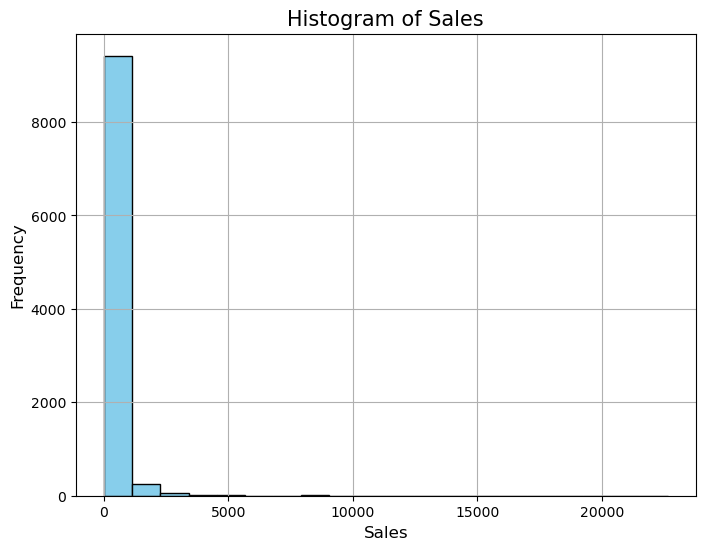

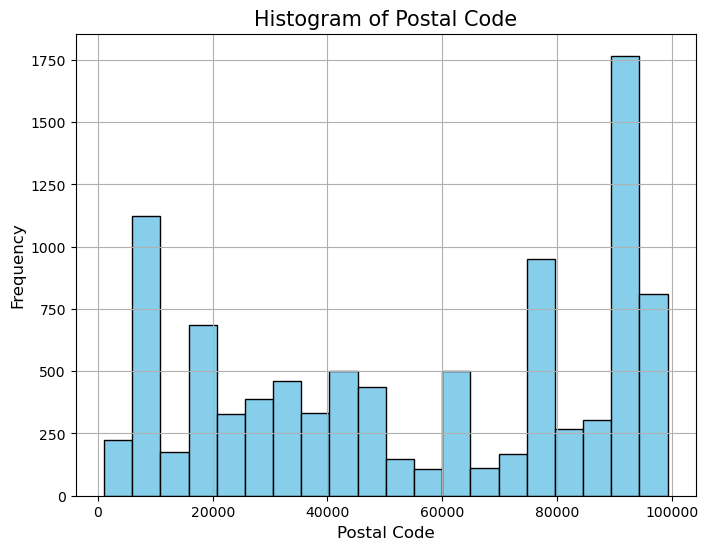

In [20]:
numeric_columns = ['Sales', 'Postal Code']  # Replace with the actual column names

# Create histograms for each numeric column
for column in numeric_columns:
    plt.figure(figsize=(8, 6))
    plt.hist(final_1[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}', fontsize=15)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(True)
    plt.show()

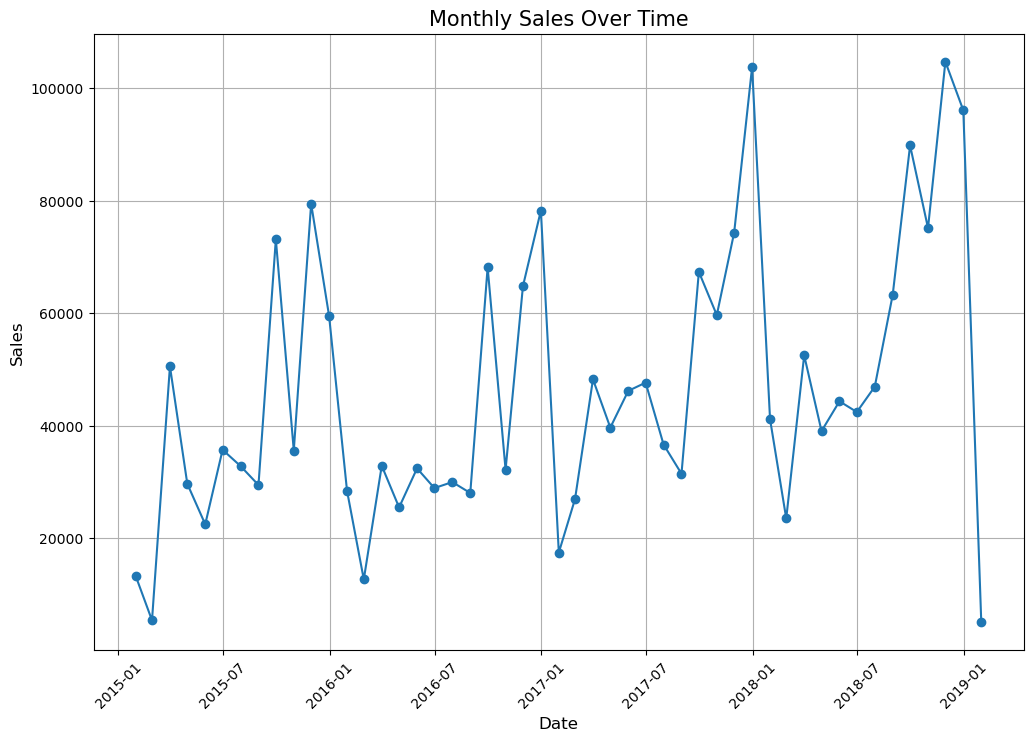

In [22]:
import matplotlib.pyplot as plt

# Convert 'Ship Date' to datetime if it's not already in datetime format
final_1['Ship Date'] = pd.to_datetime(final_1['Ship Date'], format='%d/%m/%Y')

# Set 'Ship Date' as the index for the DataFrame (assuming it's not already the index)
final_1.set_index('Ship Date', inplace=True)

# Resample the data by month and calculate the sum of sales for each month
monthly_sales = final_1['Sales'].resample('M').sum()

# Create a time series plot
plt.figure(figsize=(12, 8))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-')
plt.title('Monthly Sales Over Time', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.grid(True)
plt.show()
